## Importing Libraries

In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


## Loading Dataset

In [444]:
df= pd.read_csv("hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## EDA & Data Cleaning

In [445]:
df.shape

(119390, 36)

In [446]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [448]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [449]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [450]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [451]:
for col in df.describe(include="object"):
    print(col)
    print(df[col].unique())
    print("--"*100)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'S

## Handling Missing Values

In [452]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [453]:
df.drop(["company","agent"], axis =1 , inplace= True)
df.dropna(inplace=True)

In [454]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [455]:
df.describe() ## After Handling Missing Values

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


## Handling Outlier

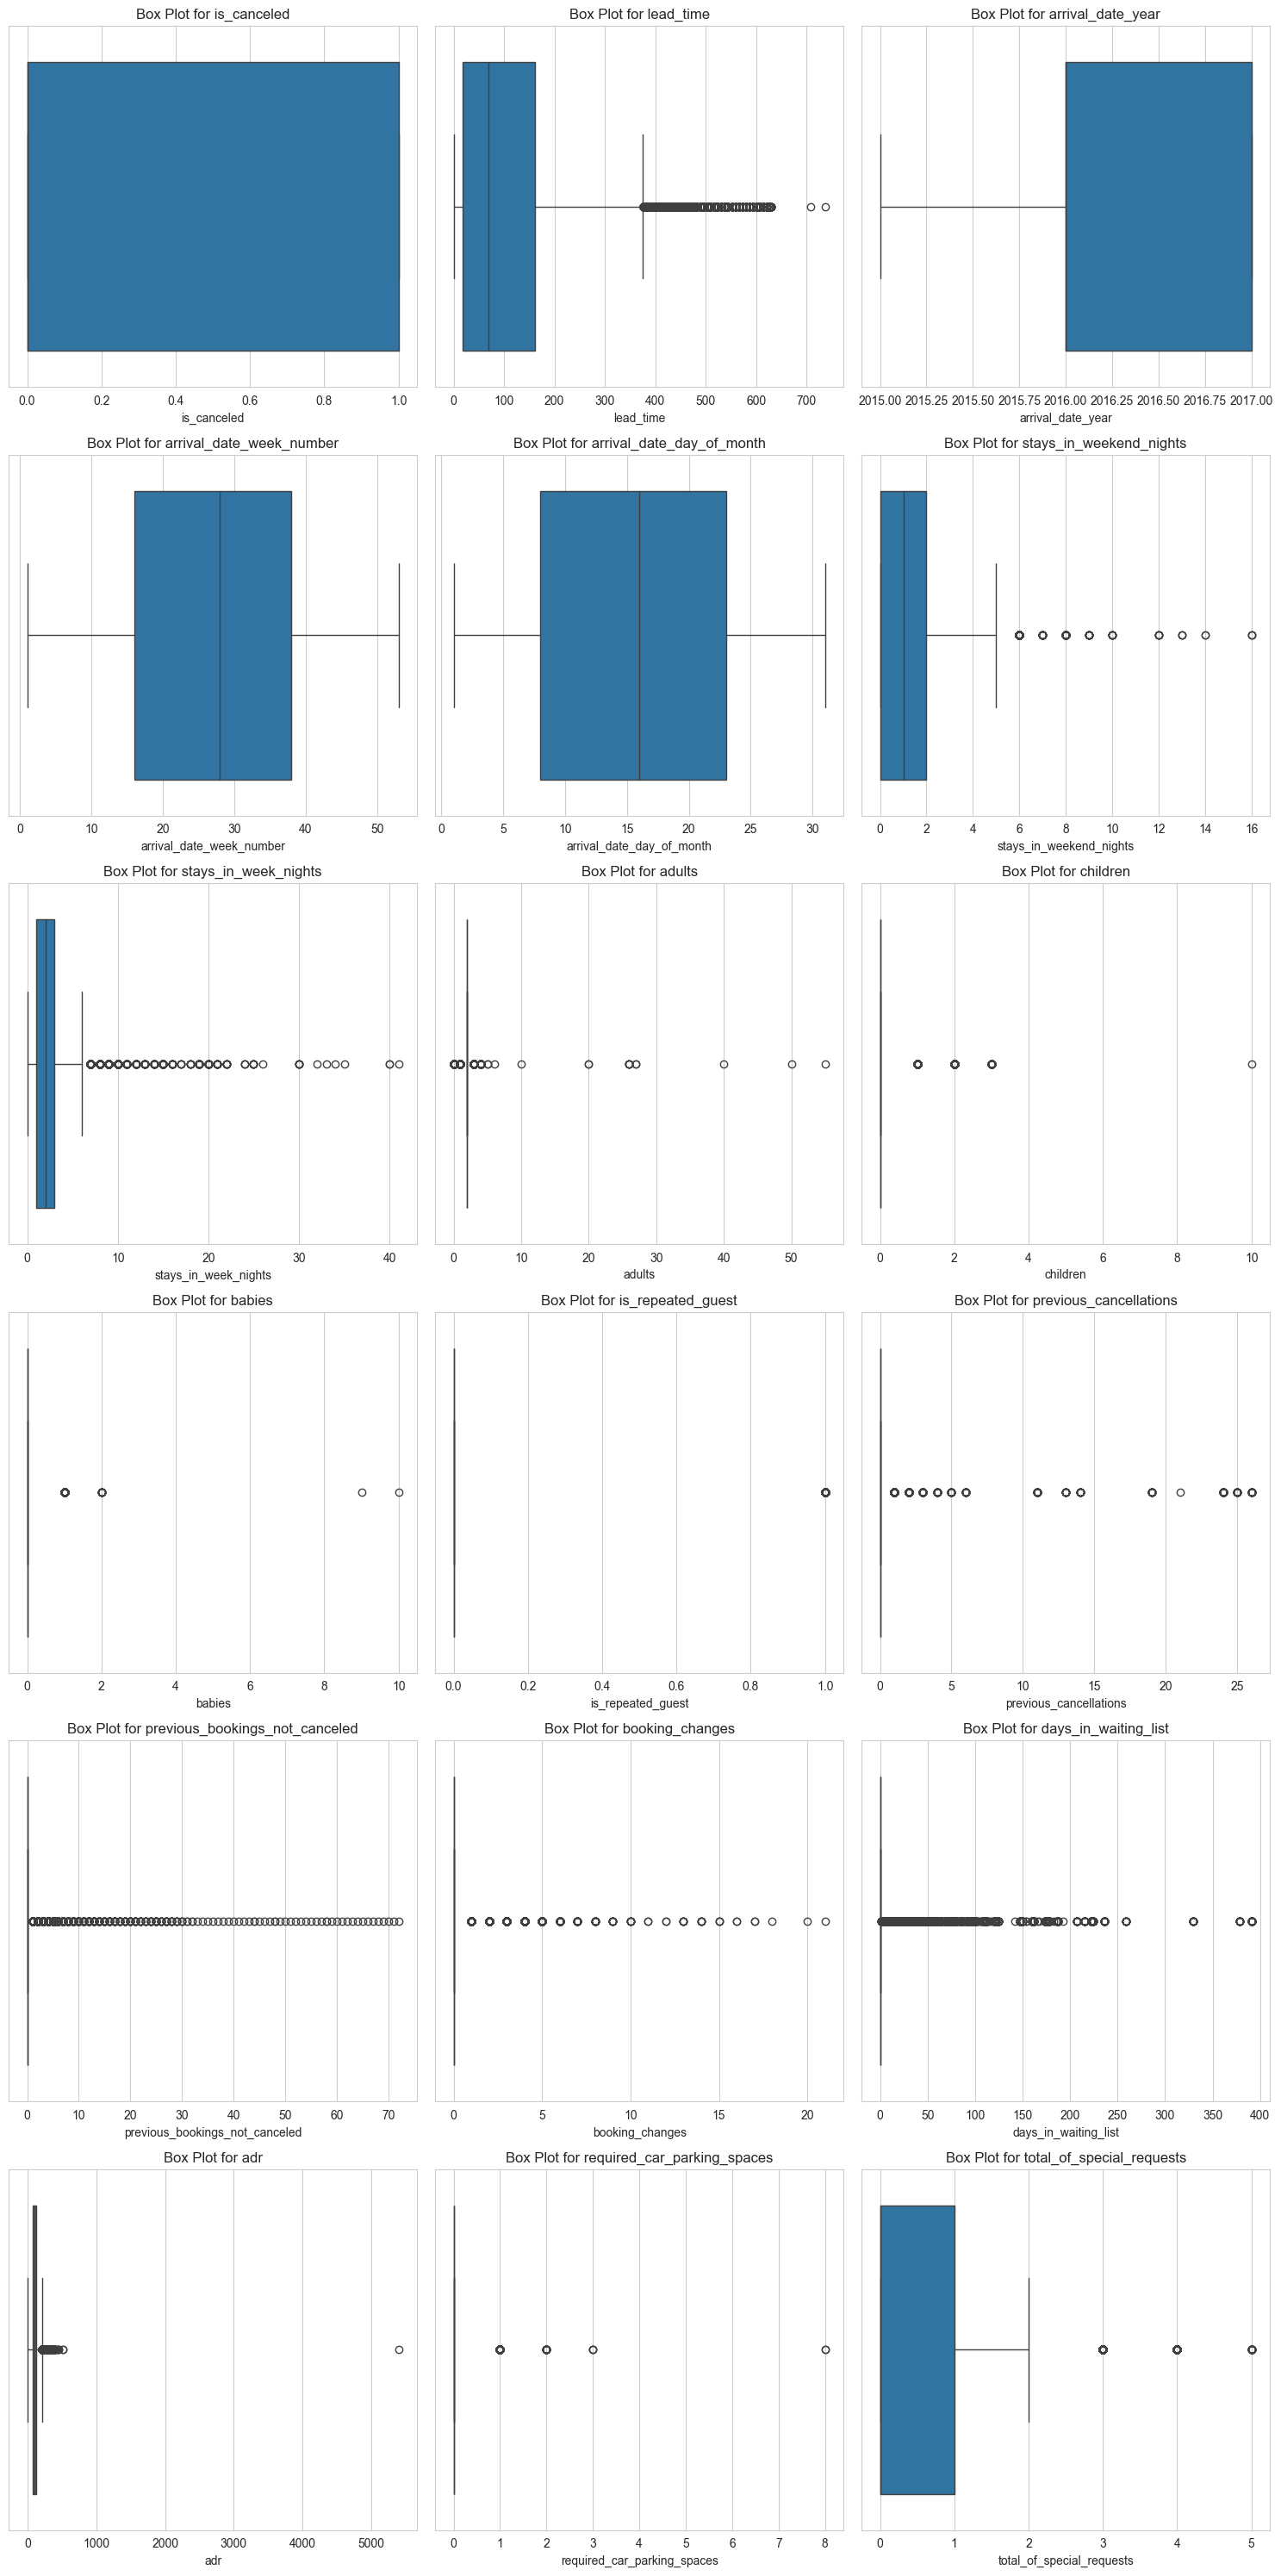

In [456]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows needed for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # To determine rows based on number of columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot box plots for each numerical column
for i in range(num_cols):
    col = numerical_cols[i]
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

# Hide any unused subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [457]:
df=df[df["adr"] <5000]

In [458]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Data Analysis and Visualizations


### 1. 

In [459]:
cancelled_perc= df["is_canceled"].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

In [460]:
sns.set_style("whitegrid")

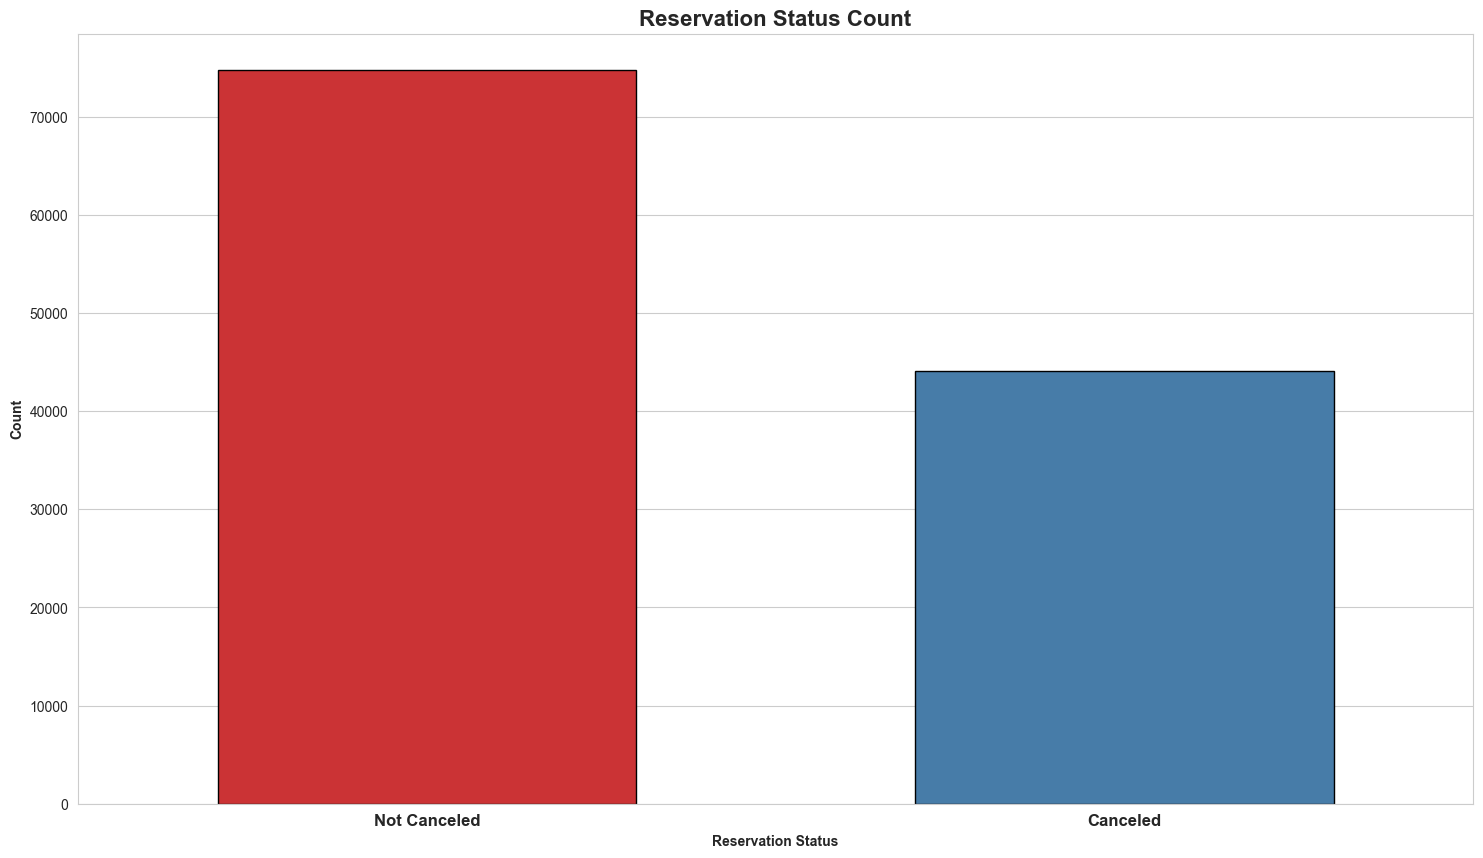

In [461]:
plt.figure(figsize=(18, 10))
sns.countplot(x='is_canceled', data=df, palette="Set1", edgecolor="k", width=.6)

plt.title('Reservation Status Count', fontsize=16, fontweight='bold')
plt.xlabel('Reservation Status', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')


plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], fontsize=12, fontweight='bold')


plt.show()

### 2.

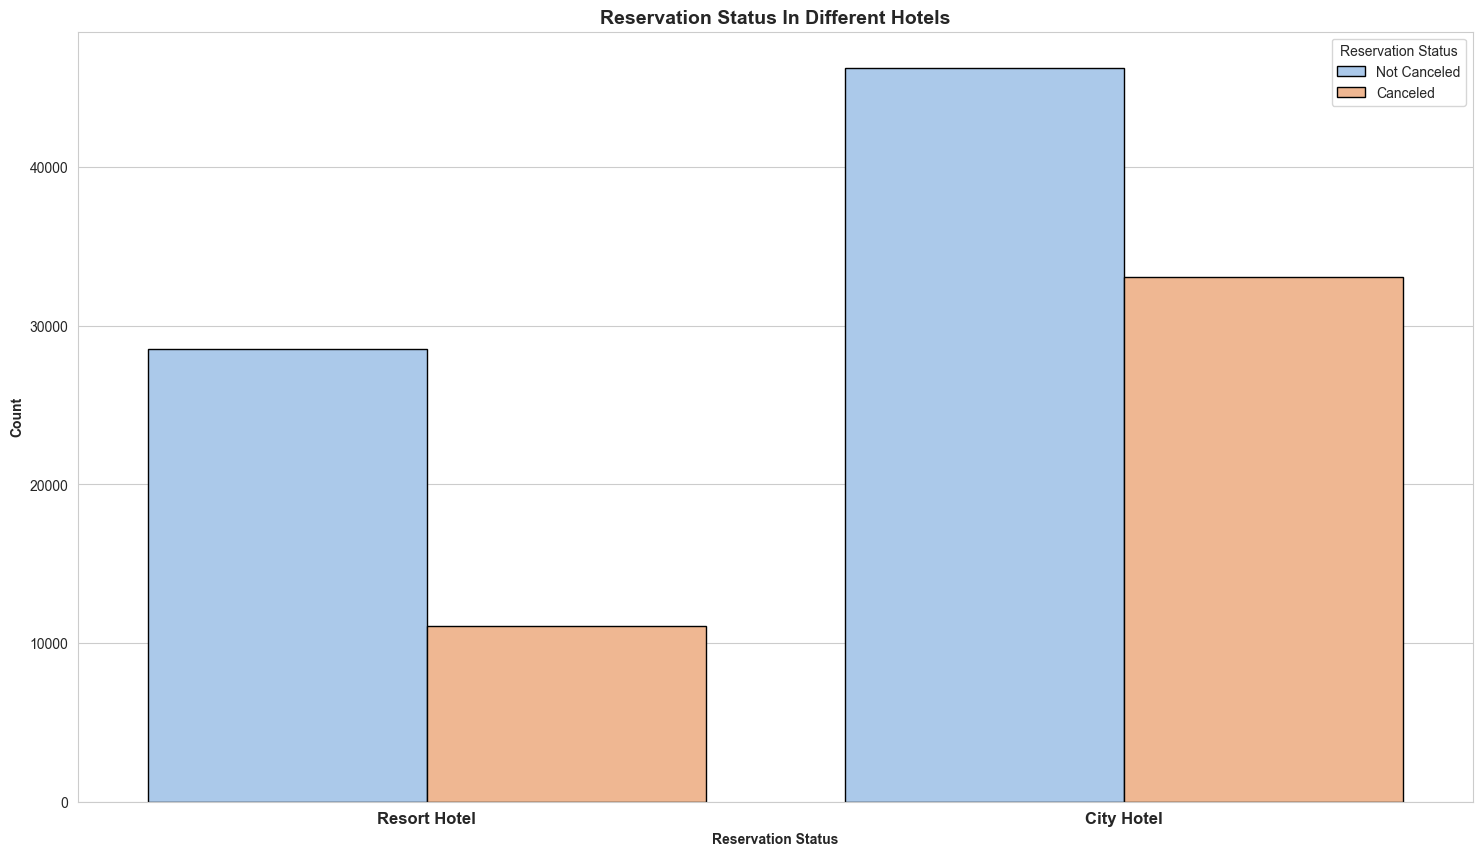

In [462]:
plt.figure(figsize=(18, 10))

ax1= sns.countplot(x="hotel" , hue = "is_canceled" , data= df , palette= "pastel",edgecolor="black")
plt.title('Reservation Status In Different Hotels', fontsize=14, fontweight='bold')
plt.xlabel('Reservation Status', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
ax1.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'])


plt.show()

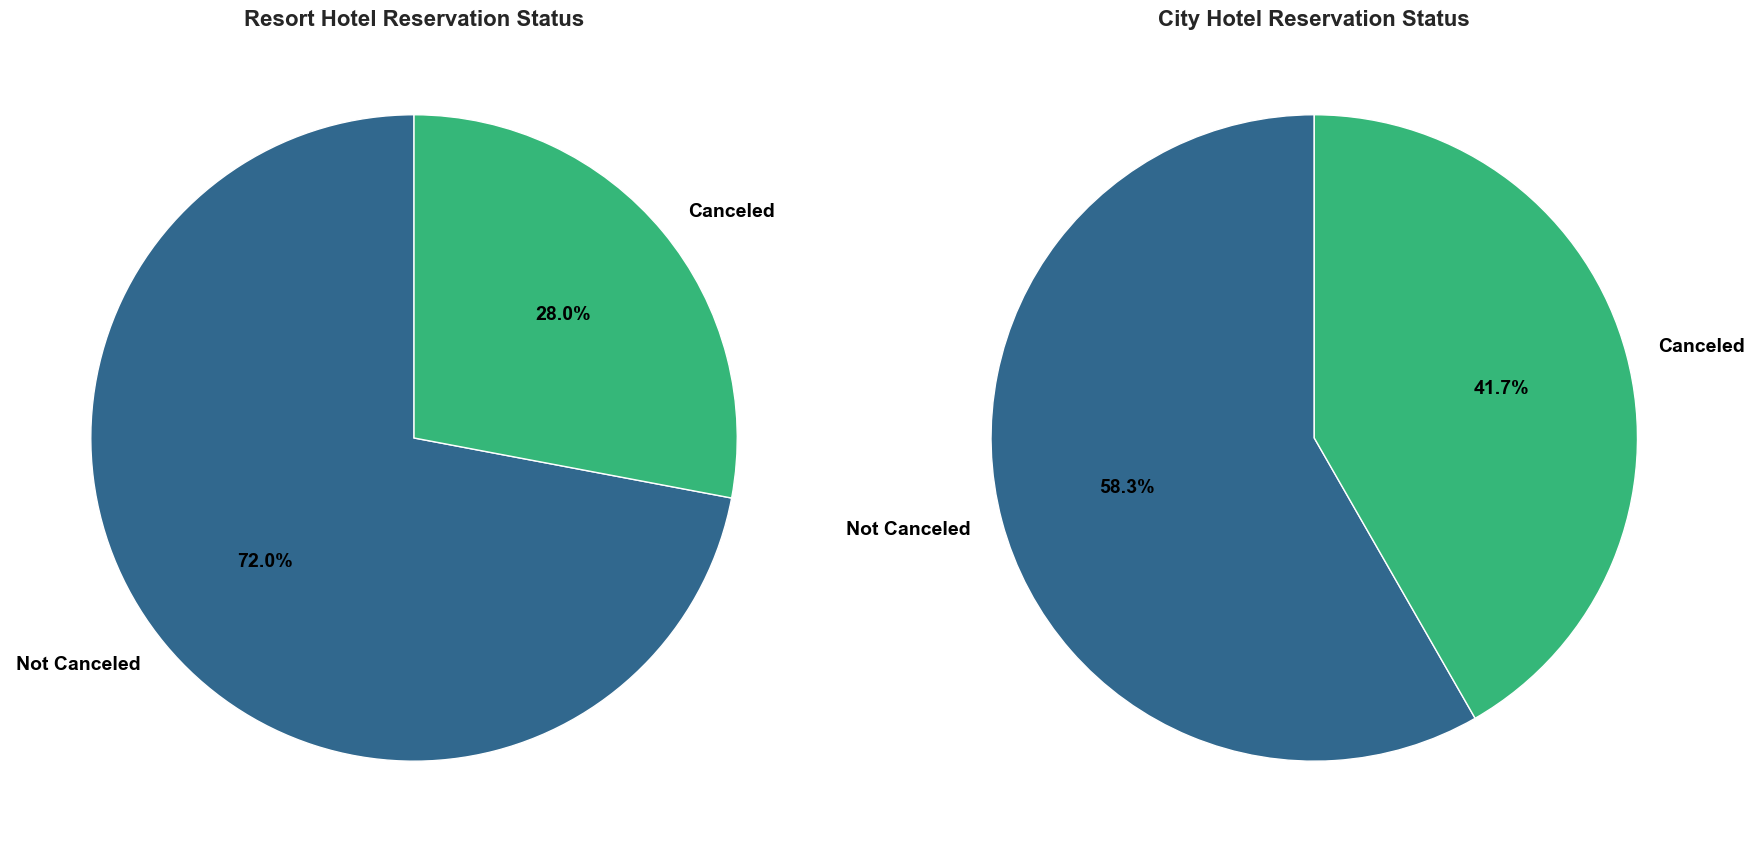

In [463]:
# Calculate percentages for Resort Hotel
resort_data = df[df['hotel'] == 'Resort Hotel']
resort_percentage = resort_data['is_canceled'].value_counts(normalize=True) * 100

# Calculate percentages for City Hotel
city_data = df[df['hotel'] == 'City Hotel']
city_percentage = city_data['is_canceled'].value_counts(normalize=True) * 100

# Create the plots
fig, axes = plt.subplots(1, 2,figsize=(18, 10))

# Plot pie chart for Resort Hotel
axes[0].pie(resort_percentage, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%',
            colors=sns.color_palette("viridis", 2), startangle=90, 
            textprops=dict(color="black", fontsize=14, weight='bold'))
axes[0].set_title('Resort Hotel Reservation Status', fontsize=16, fontweight='bold')

# Plot pie chart for City Hotel
axes[1].pie(city_percentage, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%',
            colors=sns.color_palette("viridis", 2), startangle=90, 
            textprops=dict(color="black", fontsize=14, weight='bold'))
axes[1].set_title('City Hotel Reservation Status', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


### 3.

In [464]:
resort_data = resort_data.groupby("reservation_status_date")["adr"].mean().reset_index()
city_data = city_data.groupby("reservation_status_date")["adr"].mean().reset_index()

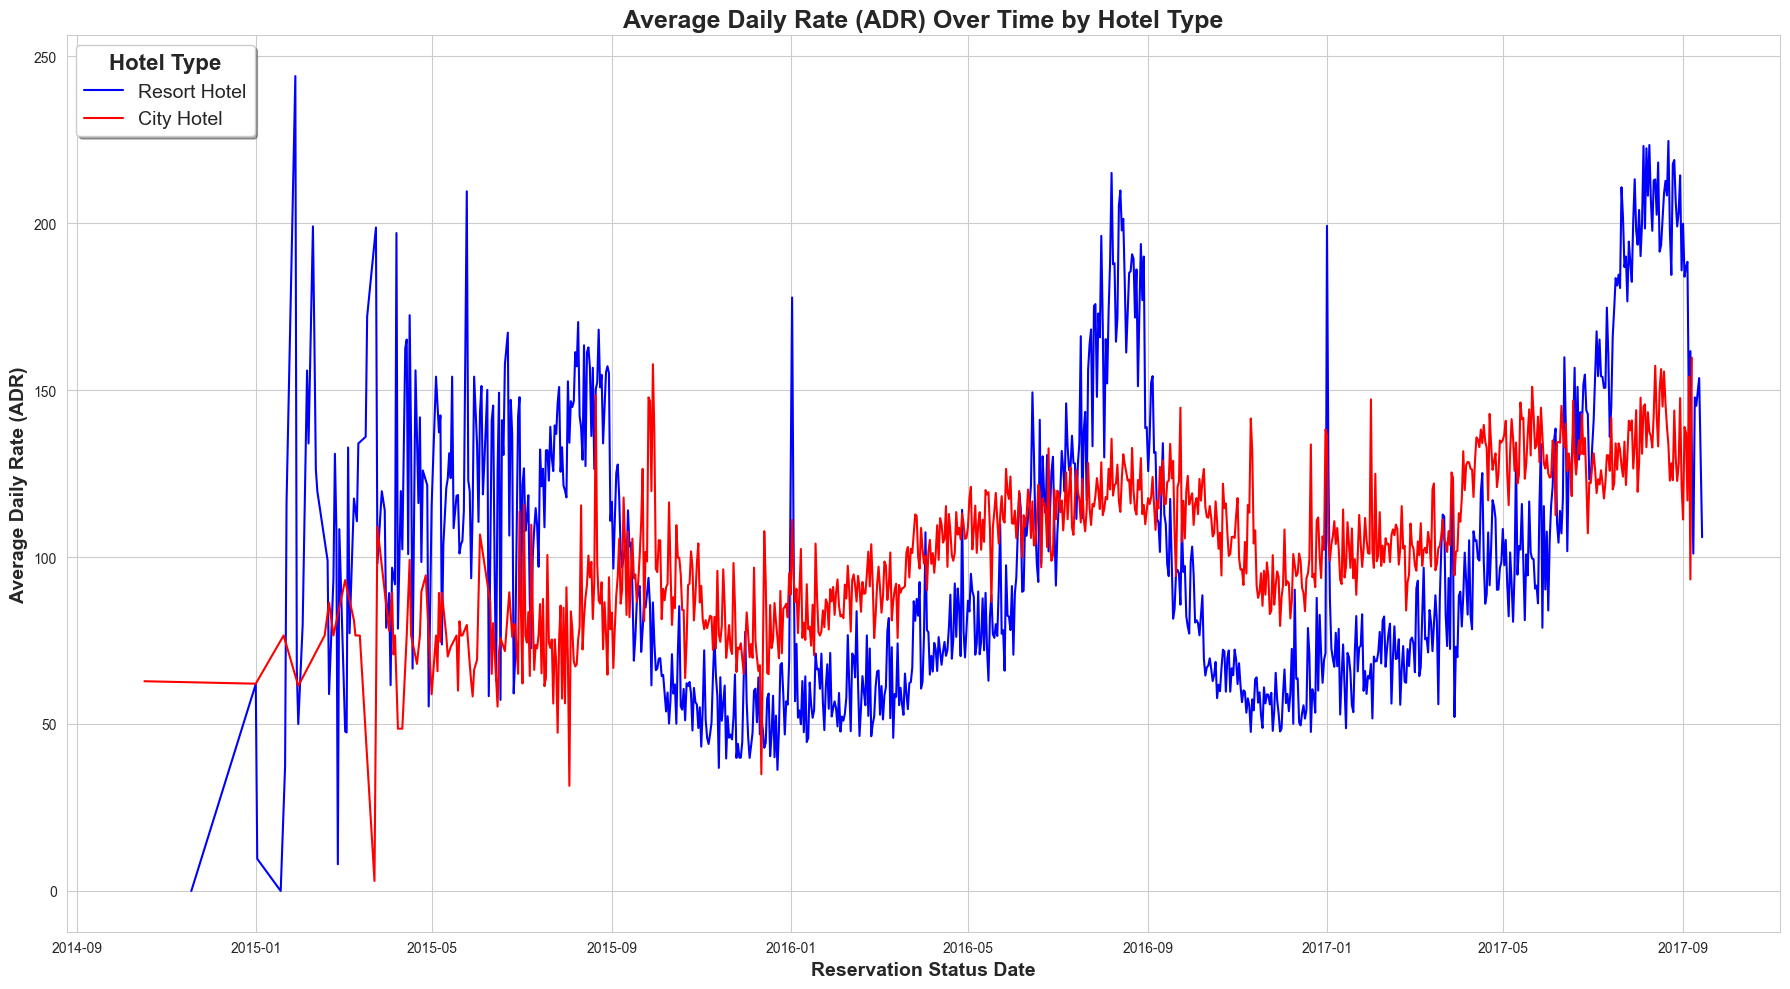

In [465]:
plt.figure(figsize=(18, 10))

# Plot lines for Resort Hotel and City Hotel
sns.lineplot(data=resort_data, x='reservation_status_date', y='adr', label='Resort Hotel', color='b')
sns.lineplot(data=city_data, x='reservation_status_date', y='adr', label='City Hotel', color='r')

# Customize plot
plt.title('Average Daily Rate (ADR) Over Time by Hotel Type', fontsize=18, fontweight='bold')
plt.xlabel('Reservation Status Date', fontsize=14, fontweight='bold')
plt.ylabel('Average Daily Rate (ADR)', fontsize=14, fontweight='bold')
legend = plt.legend(
    title='Hotel Type', 
    title_fontsize='16',  # Larger font size for the title
    fontsize='14',        # Larger font size for legend labels
    loc='upper left',    # Adjust the location as needed
    frameon=True,        # Add a frame around the legend
    shadow=True,        # Add shadow to the legend box
    fancybox=True       # Rounded corners for the legend box
)

# Customize the title
legend.get_title().set_fontsize('16')  # Title font size
legend.get_title().set_fontweight('bold')  # Title font weight

# Customize the legend labels
for text in legend.get_texts():
    text.set_fontsize('14')  # Label font size
# Show the plot
plt.tight_layout()
plt.show()

### 4.

In [466]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


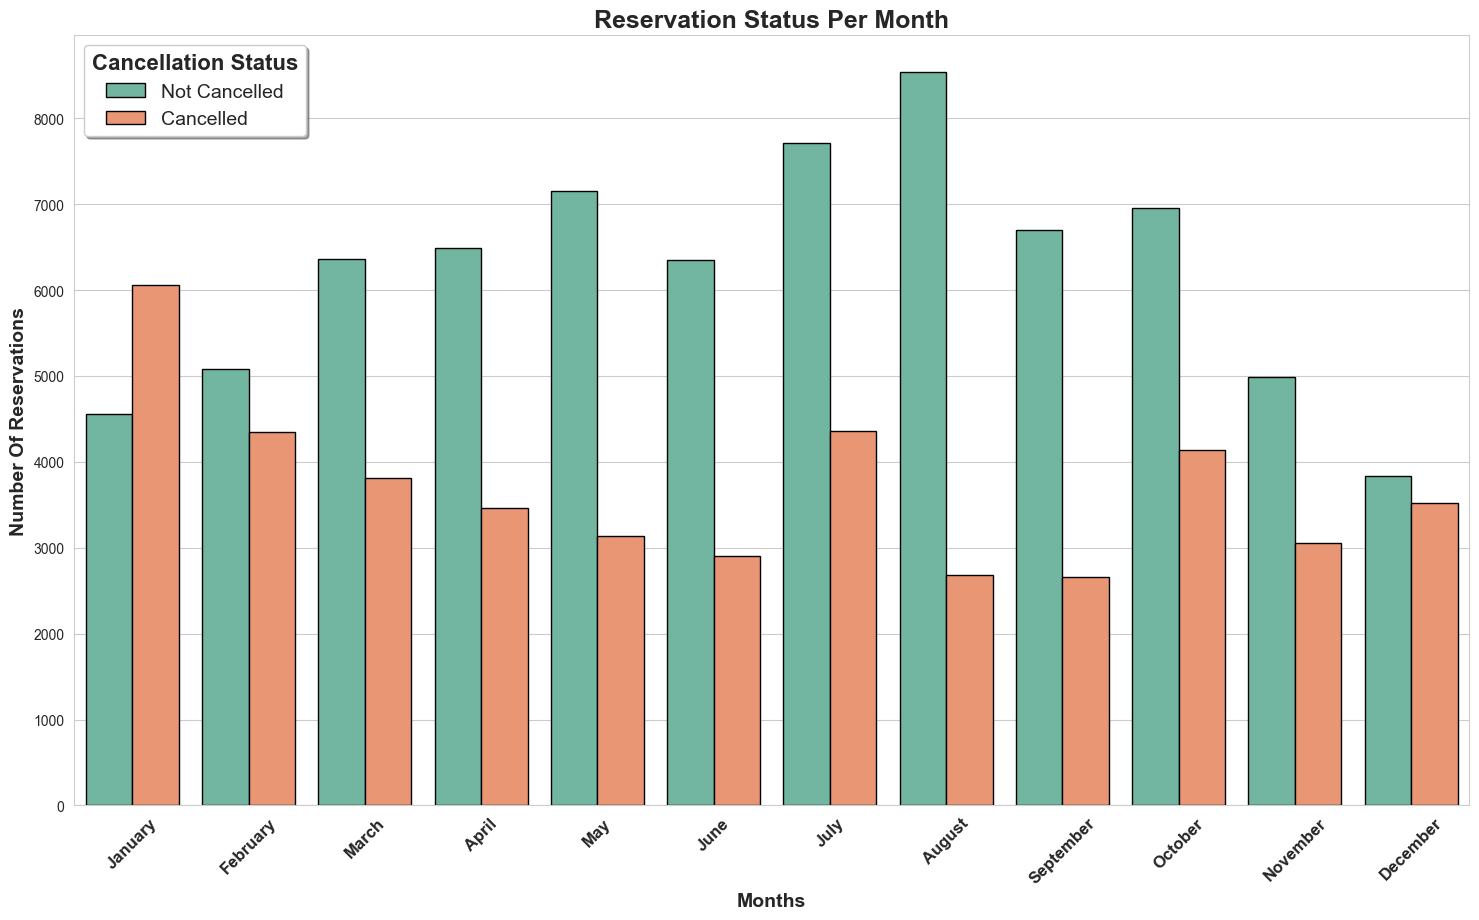

In [467]:
import calendar
# Create a 'month' column with month names
df['month'] = df['reservation_status_date'].dt.month_name()

# List of months in the correct order
month_order = list(calendar.month_name[1:])  # Get month names from January to December

# Set the figure size
plt.figure(figsize=(18, 10))

# Create the count plot with hue for 'is_canceled'
sns.countplot(data=df, x='month', hue='is_canceled', palette='Set2', edgecolor="k", order=month_order)

# Customize plot labels and title
plt.title('Reservation Status Per Month', fontsize=18, fontweight='bold')
plt.xlabel('Months', fontsize=14, fontweight='bold')
plt.ylabel('Number Of Reservations', fontsize=14, fontweight='bold')

# Set the x-axis labels to be month names
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Create and customize the legend
legend = plt.legend(["Not Cancelled","Cancelled"],
    title='Cancellation Status', 
    title_fontsize='16',  # Larger font size for the title
    fontsize='14',        # Larger font size for legend labels
    loc='upper left',    # Adjust the location as needed
    frameon=True,        # Add a frame around the legend
    shadow=True,        # Add shadow to the legend box
    fancybox=True       # Rounded corners for the legend box
)
# Customize the title
legend.get_title().set_fontsize('16')  # Title font size
legend.get_title().set_fontweight('bold')  # Title font weight

# Customize the legend labels
for text in legend.get_texts():
    text.set_fontsize('14')  # Label font size

### 5.

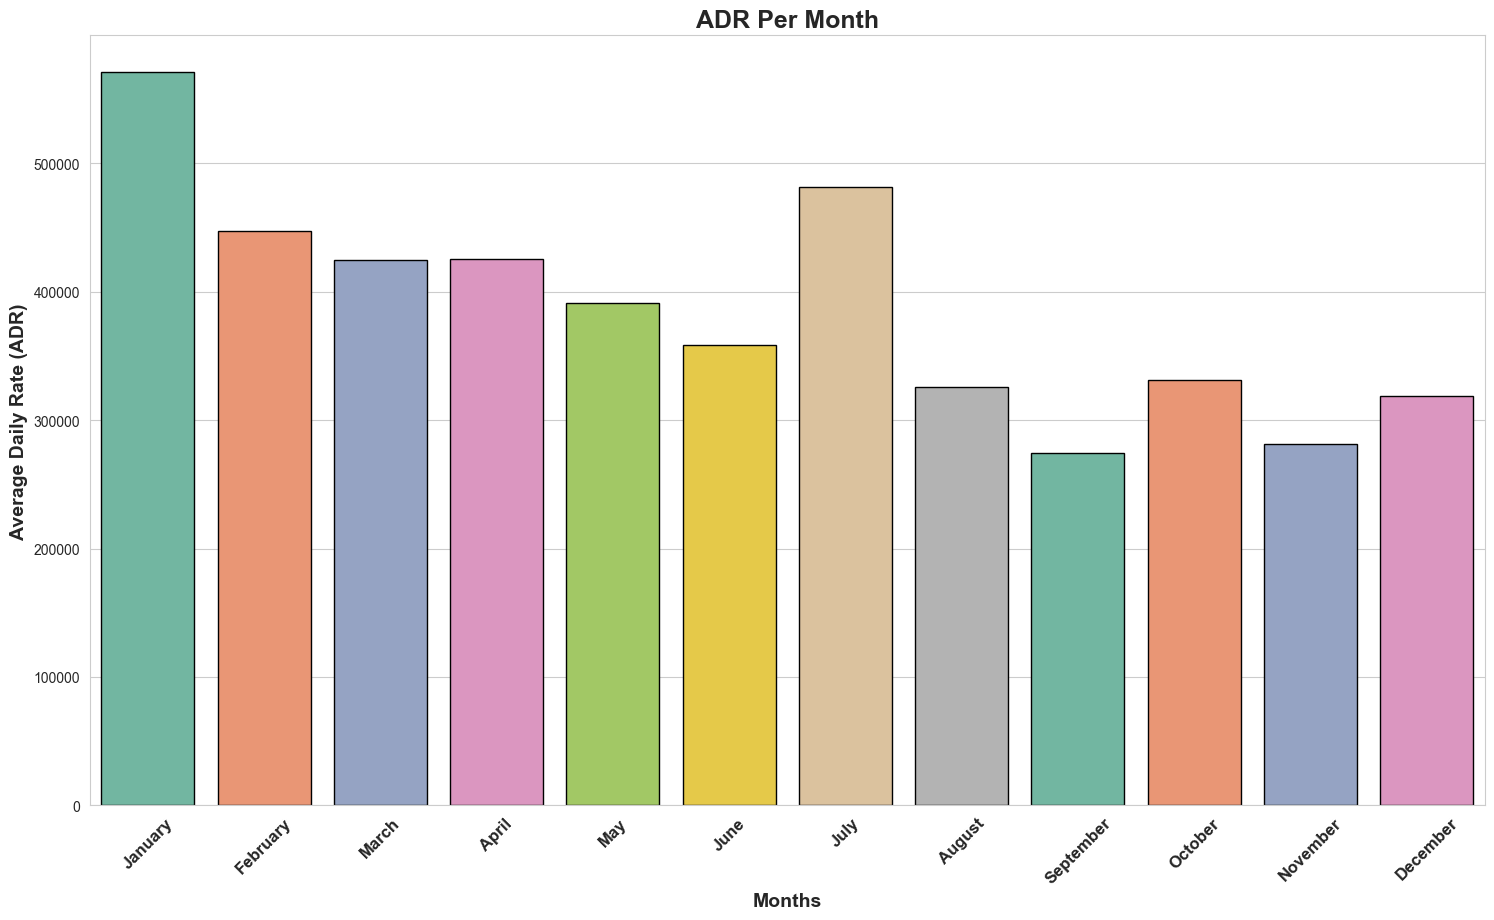

In [468]:
plt.figure(figsize=(18, 10))
month_order = list(calendar.month_name[1:])  # Get month names from January to December
sns.barplot(data=df[df["is_canceled"]==1].groupby("month")["adr"].sum().reset_index(), x="month",y="adr",order=month_order,edgecolor="k",palette="Set2")
plt.title('ADR Per Month', fontsize=18, fontweight='bold')
plt.xlabel('Months', fontsize=14, fontweight='bold')
plt.ylabel('Average Daily Rate (ADR)', fontsize=14, fontweight='bold')

# Set the x-axis labels to be month names
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.show()